In [80]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestRegressor()
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score)
from sklearn.metrics import RocCurveDisplay
%matplotlib inline
plt.style.use('seaborn-v0_8')
from xgboost import XGBClassifier
model = XGBClassifier()

In [81]:
train_1 = pd.read_csv('train_1.csv')
train_1

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7,1
599996,599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7,1
599997,599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7,0
599998,599998,53.716562,1,4.000000,120.061556,276.966278,0,0,171.195150,1,3.007003,2,1,3,1


In [82]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [83]:
display(train_1.describe())

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,173205.225094,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,0.000000,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,149999.750000,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,299999.500000,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,449999.250000,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,599999.000000,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


In [84]:
train_1.drop('ID', axis=1, inplace=True)

In [85]:
dupl_columns = list(train_1.columns)
dupl_columns.remove

mask = train_1.duplicated(subset=dupl_columns)
train_1_duplicates = train_1[mask]
print(f'Число найденных дубликатов: {train_1_duplicates.shape[0]}')

Число найденных дубликатов: 0


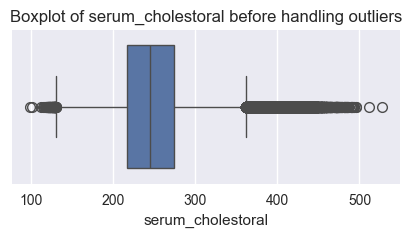

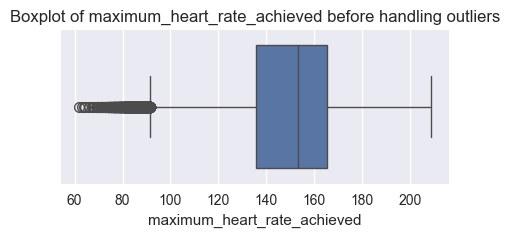

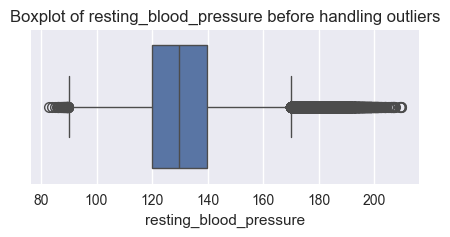

In [86]:
columns = ['serum_cholestoral', 'maximum_heart_rate_achieved', 'resting_blood_pressure']

for i in columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=train_1[i])
    plt.title(f'Boxplot of {i} before handling outliers')
    plt.show()

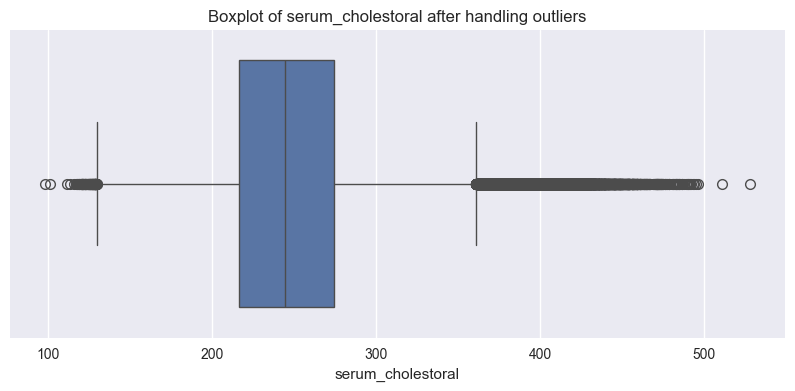

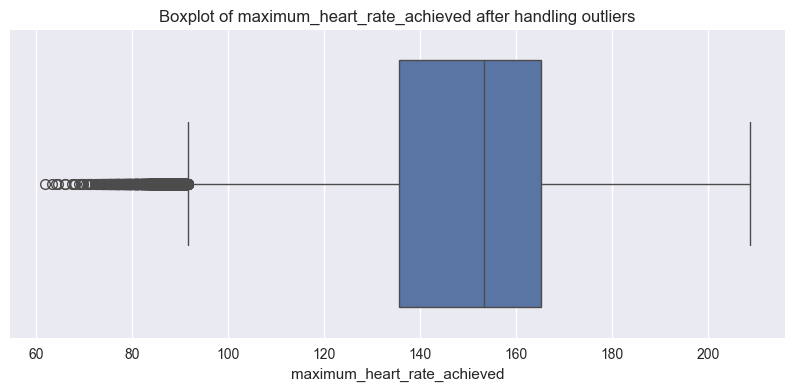

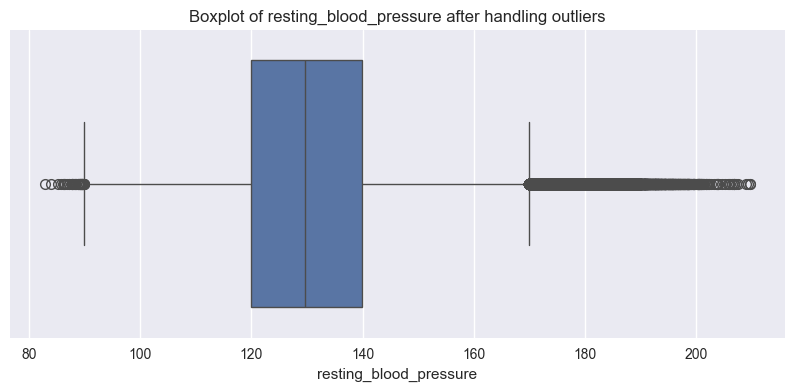

In [87]:
for i in columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train_1[i])
    plt.title(f'Boxplot of {i} after handling outliers')
    plt.show()

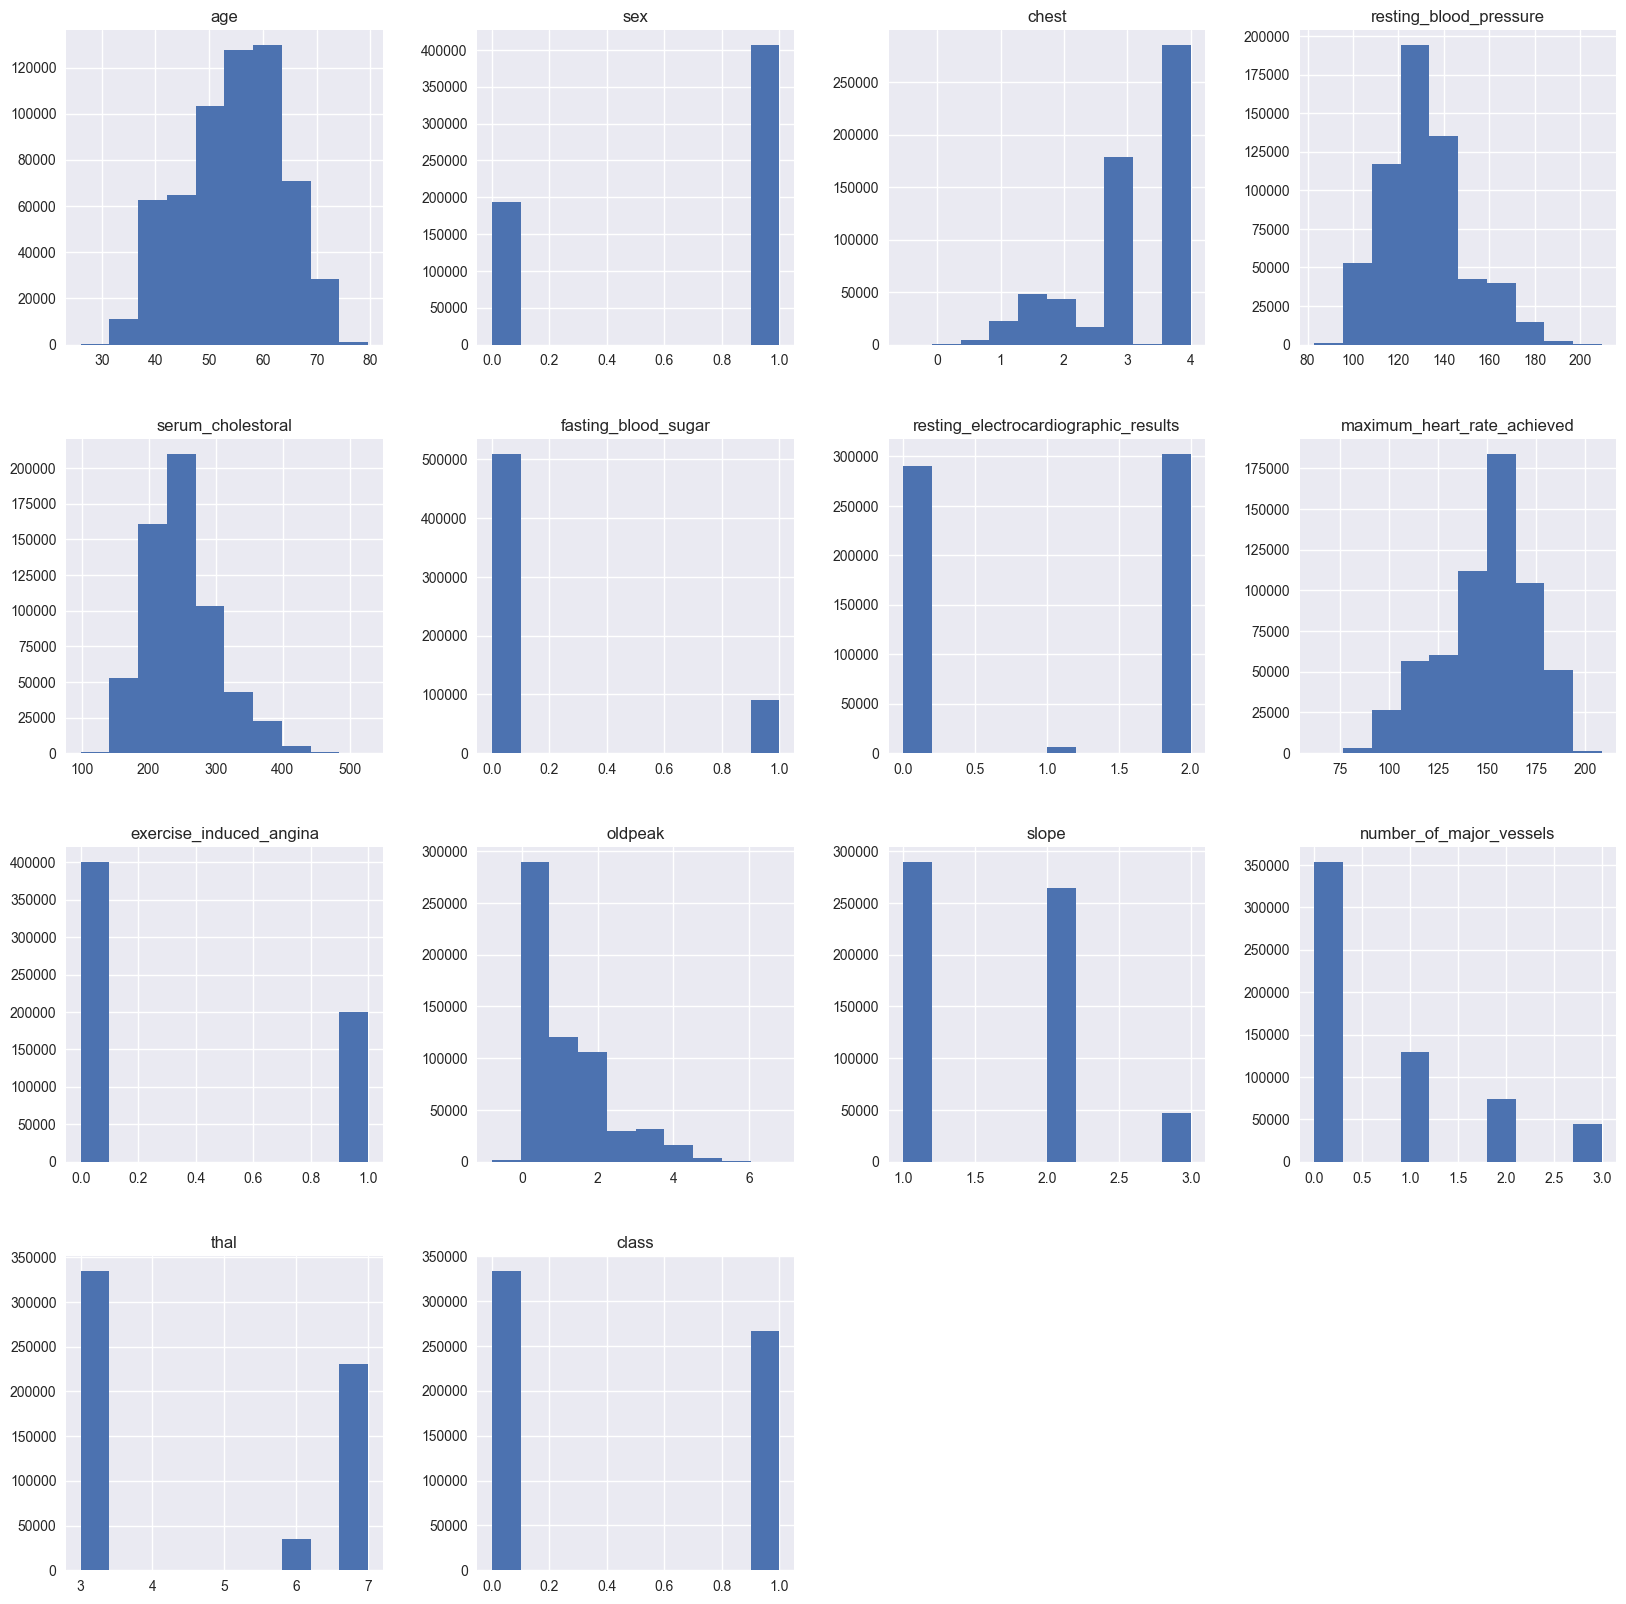

In [88]:
train_1.hist(figsize=(20,20))
plt.show()

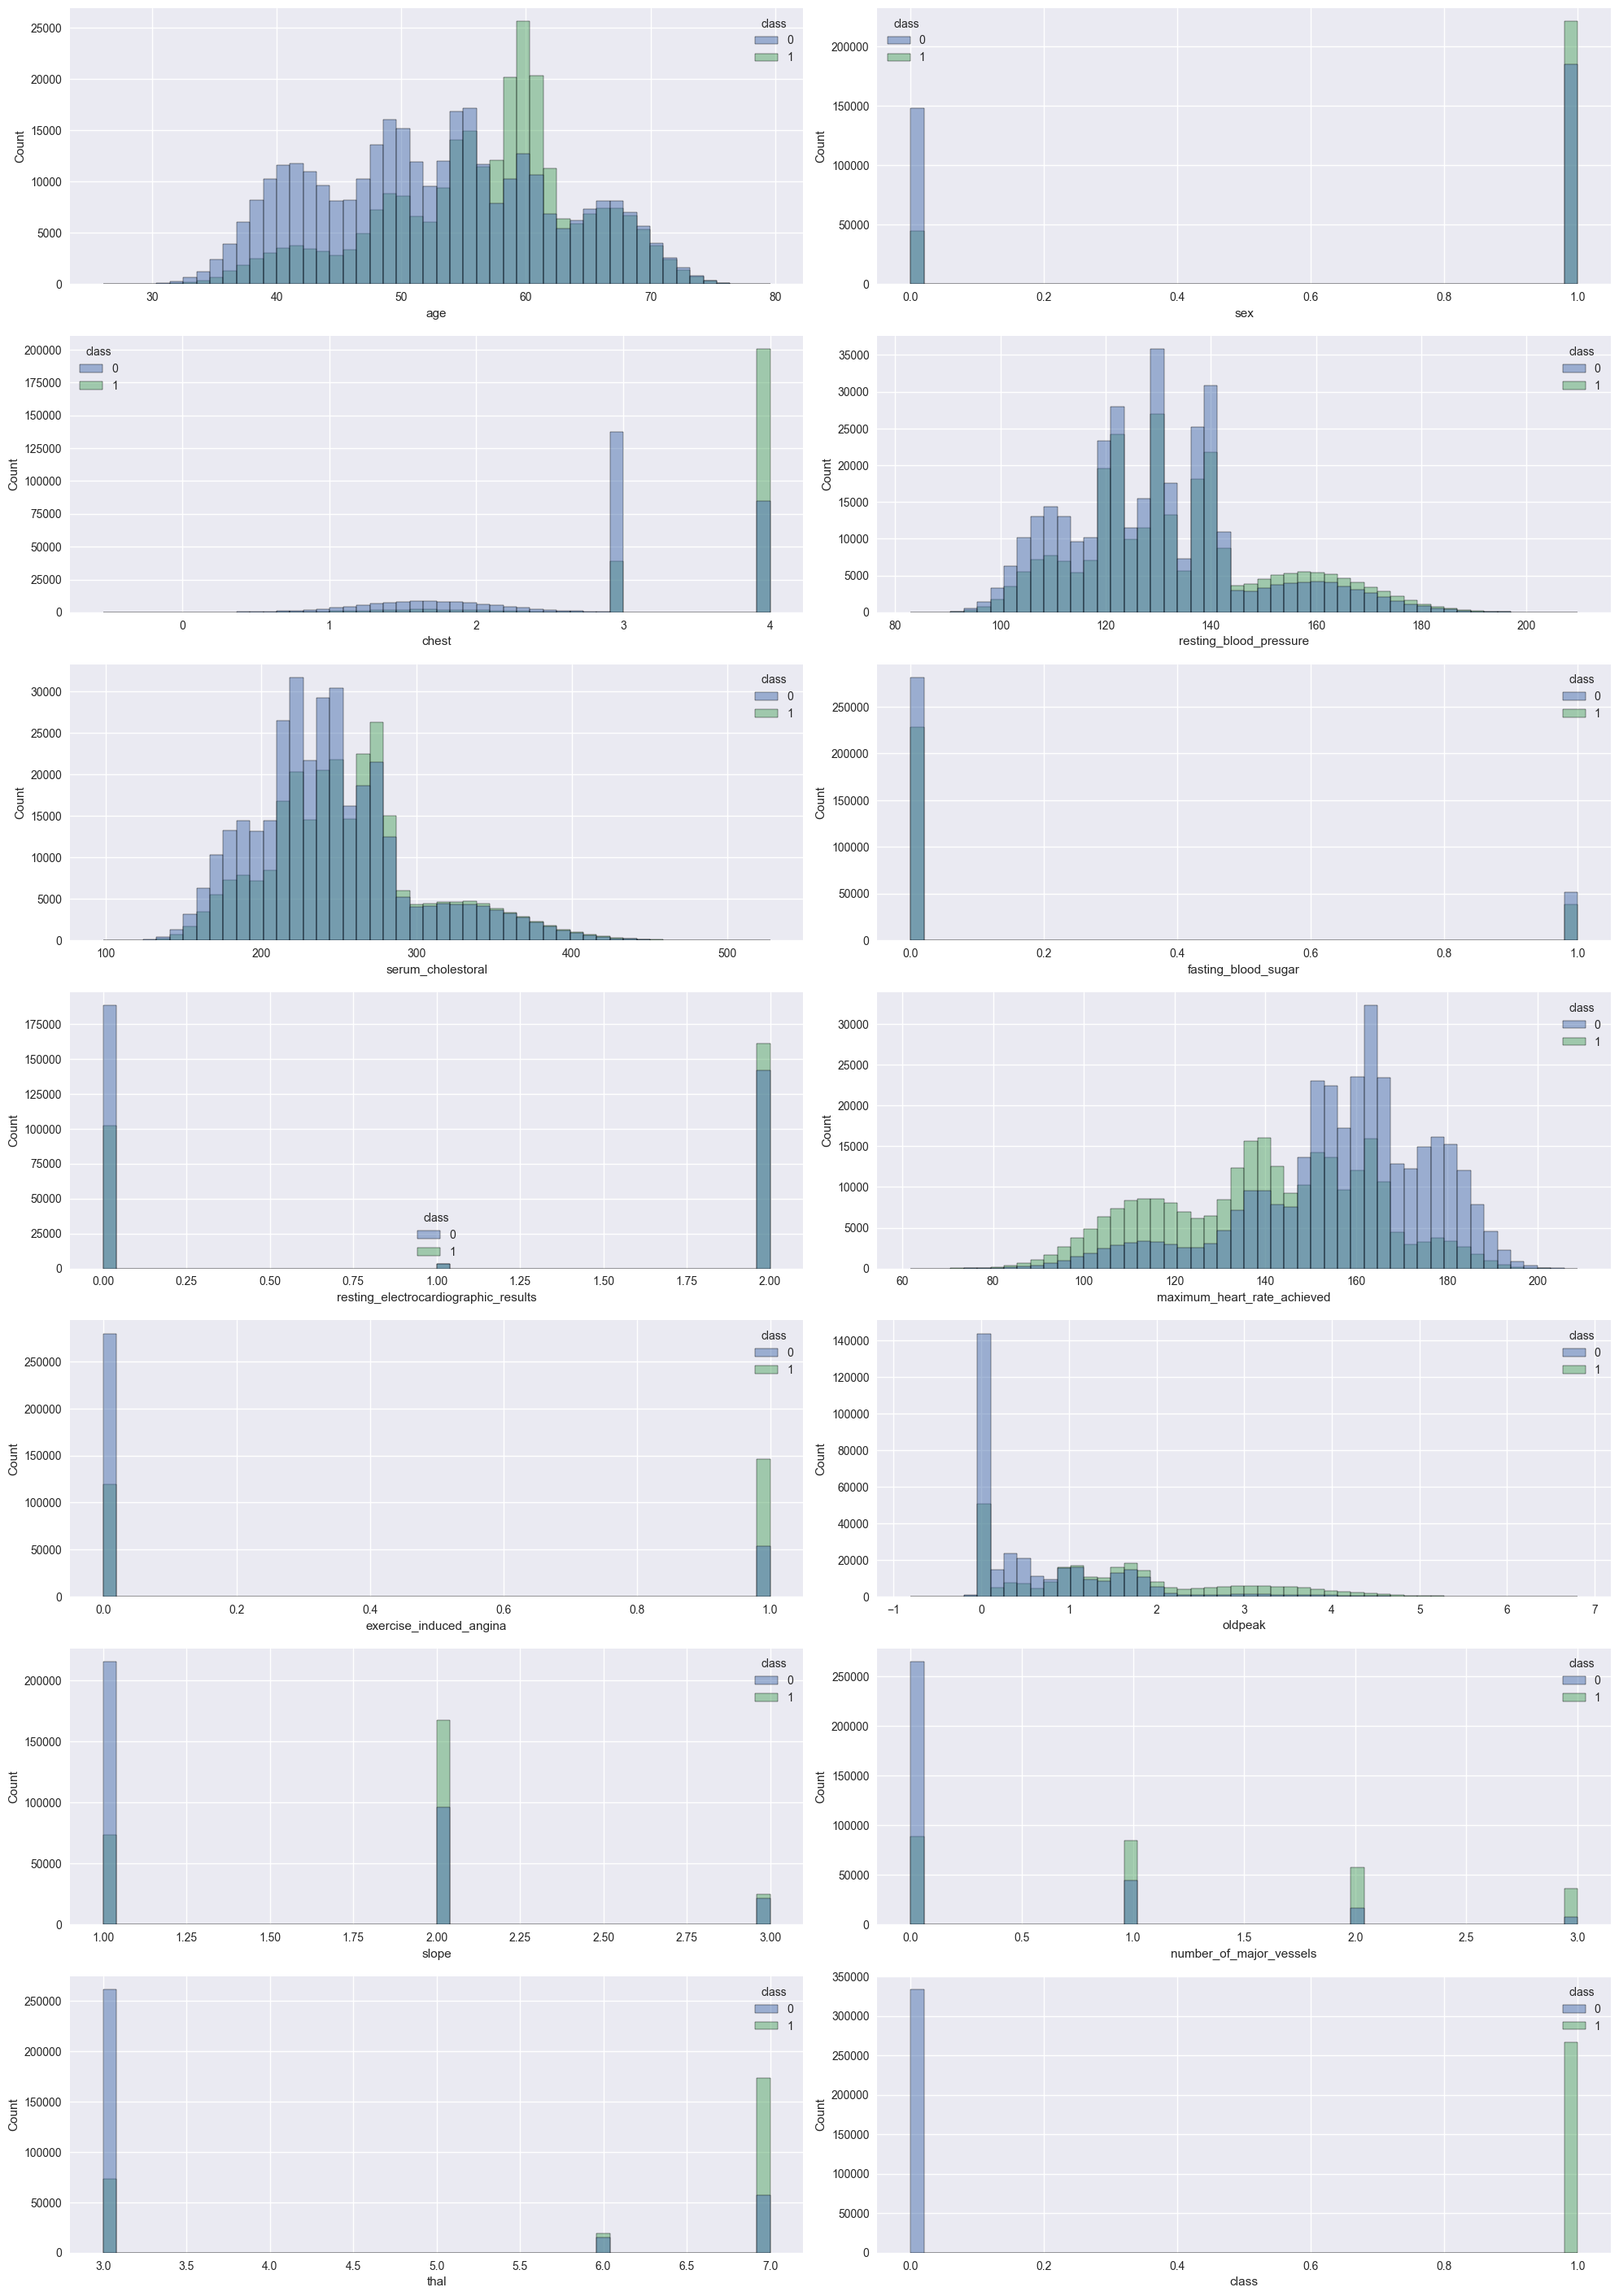

In [89]:
plt.figure(figsize=(20, 40), dpi=100)

for i, column in enumerate(train_1.select_dtypes(include=['number']), start=1):
    plt.subplot(10, 2, i)
    sns.histplot(data=train_1, x=column, hue='class', bins=50)
    plt.tight_layout()

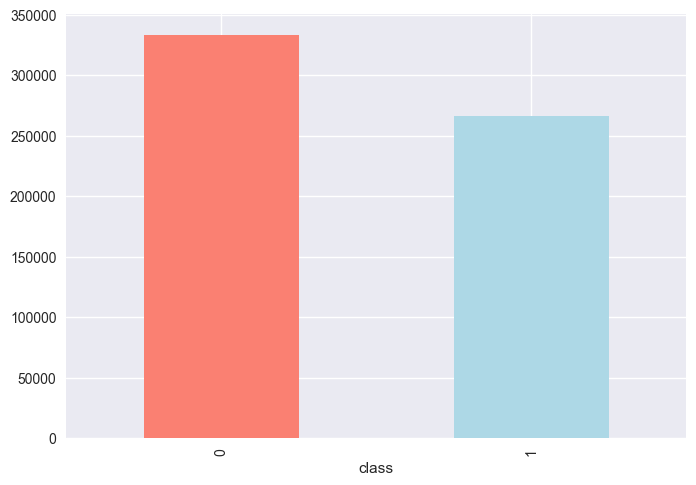

In [90]:
train_1['class'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

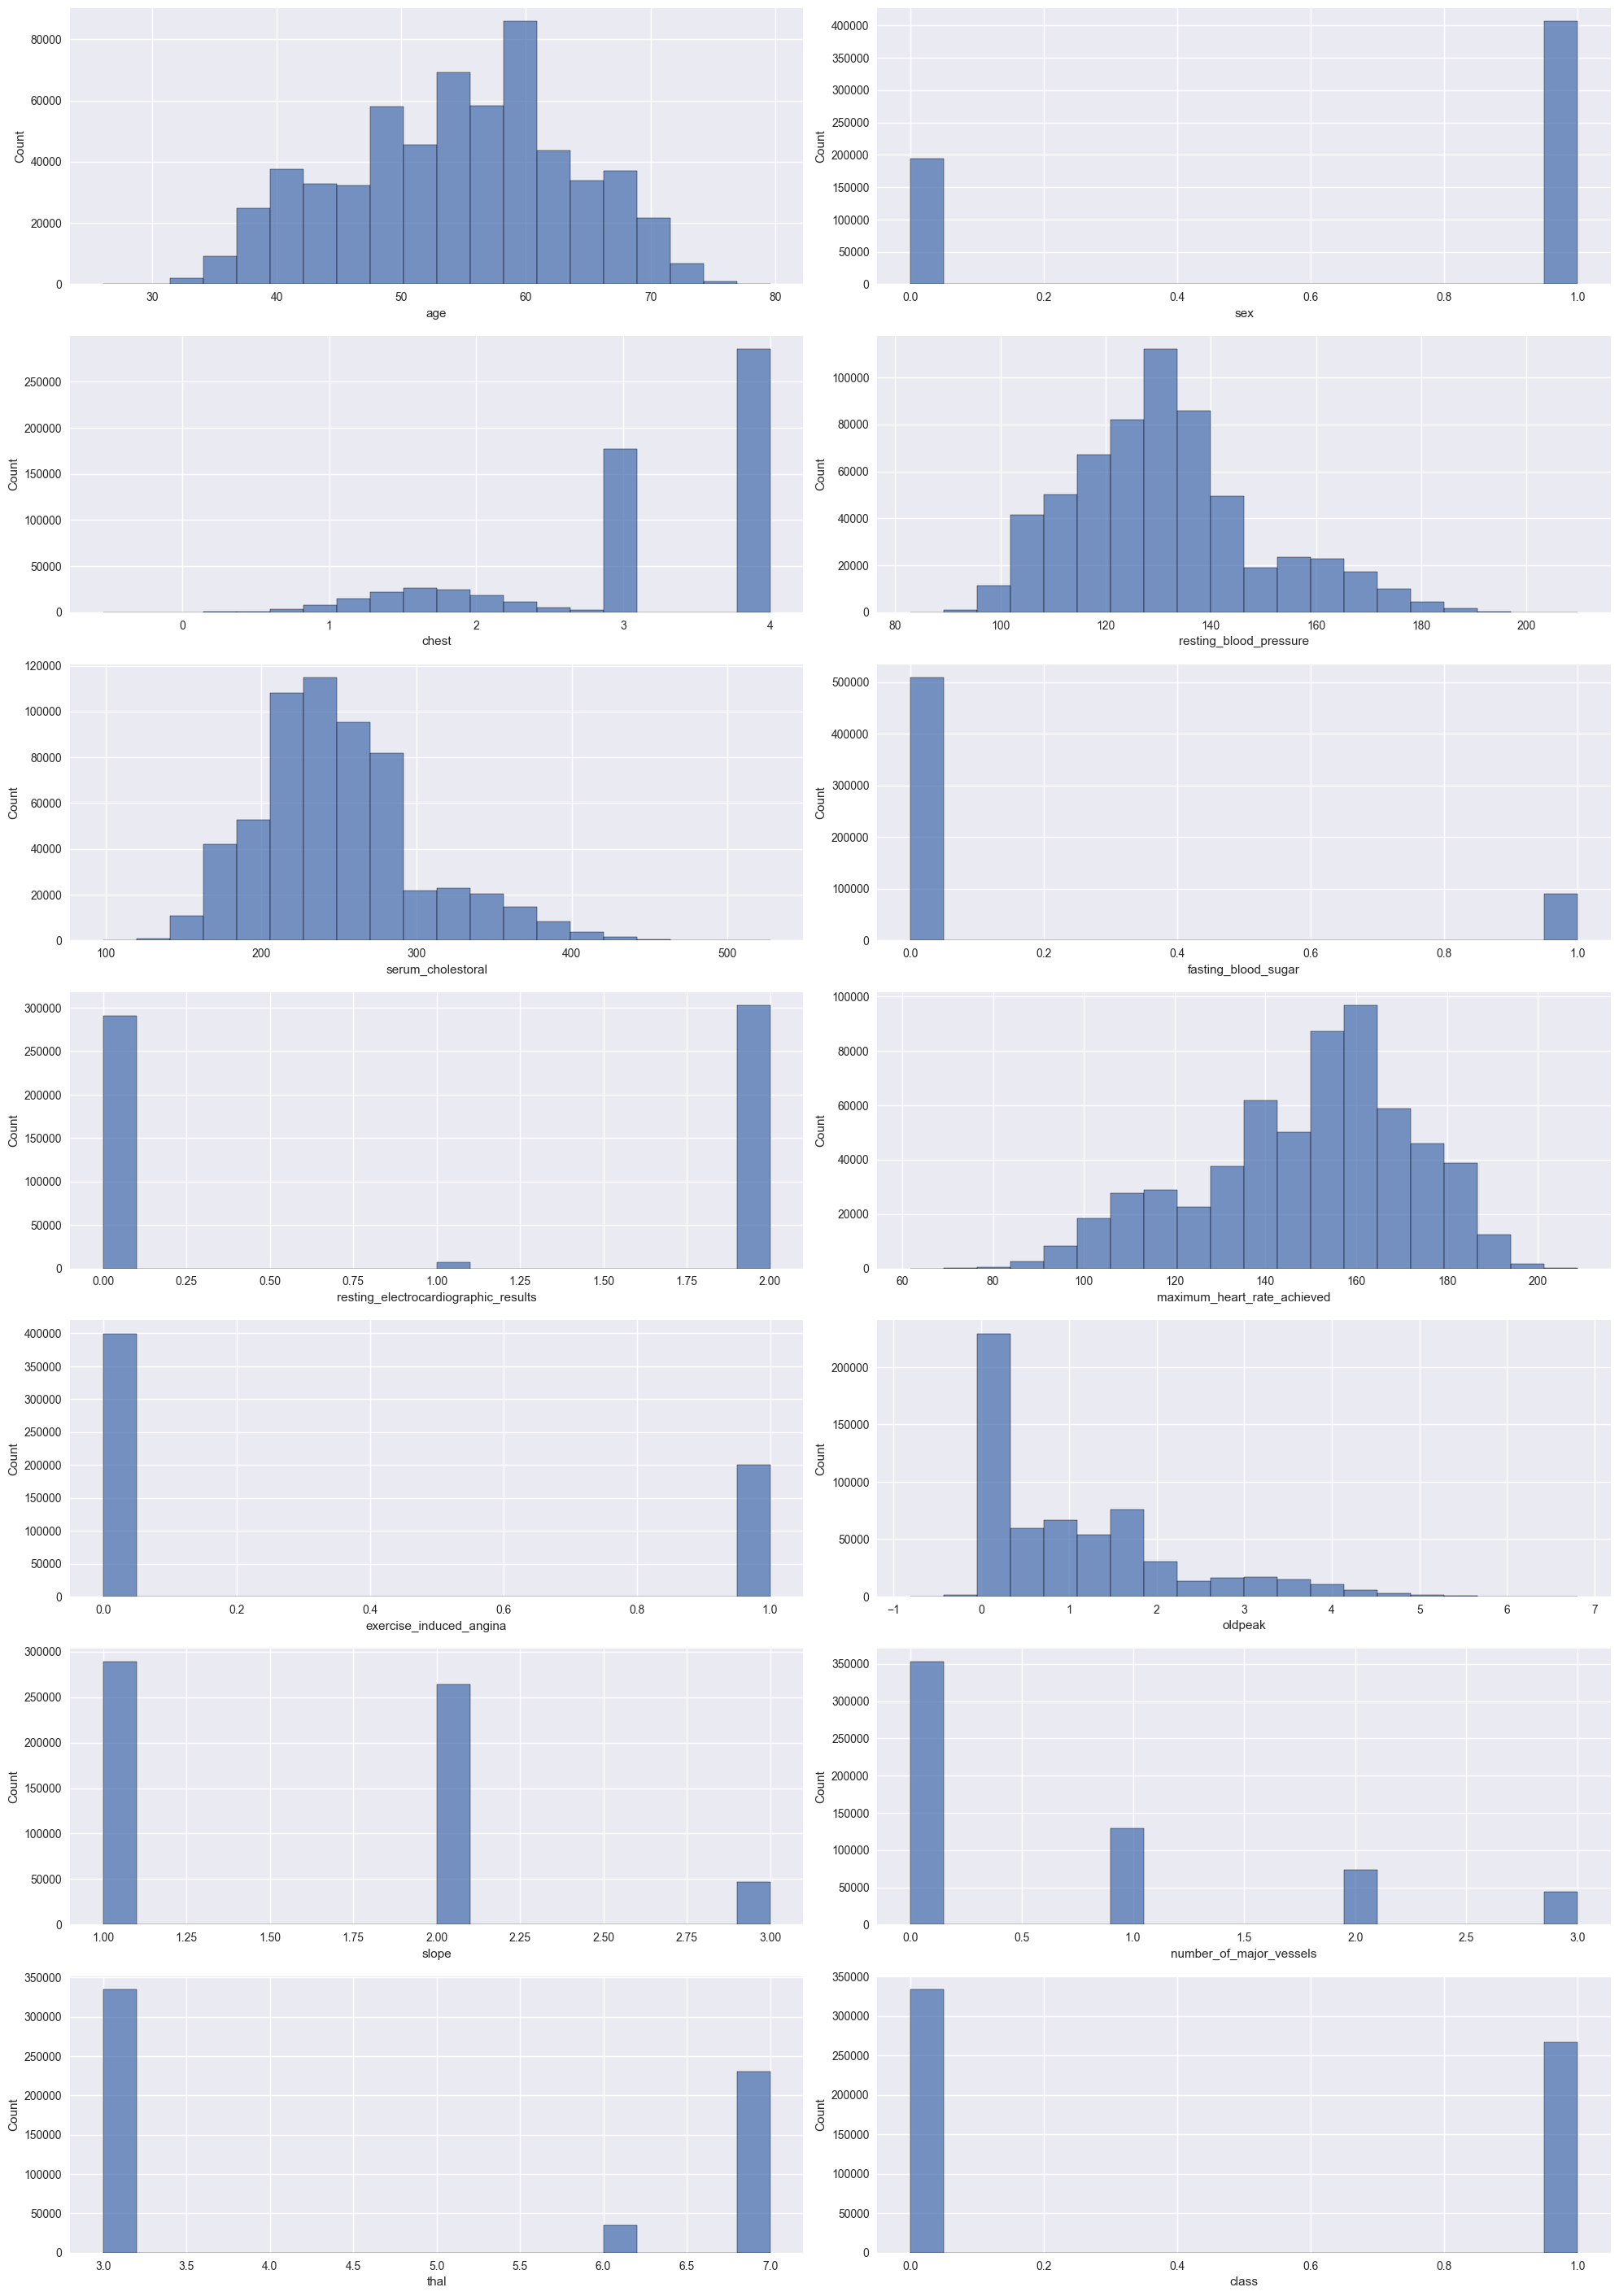

In [91]:
plt.figure(figsize=(20, 40), dpi=100)

for i, column in enumerate(train_1.select_dtypes(include=['number']).columns, start=1):
    plt.subplot(10, 2, i)
    sns.histplot(data=train_1, x=column, bins=20)

    plt.tight_layout()

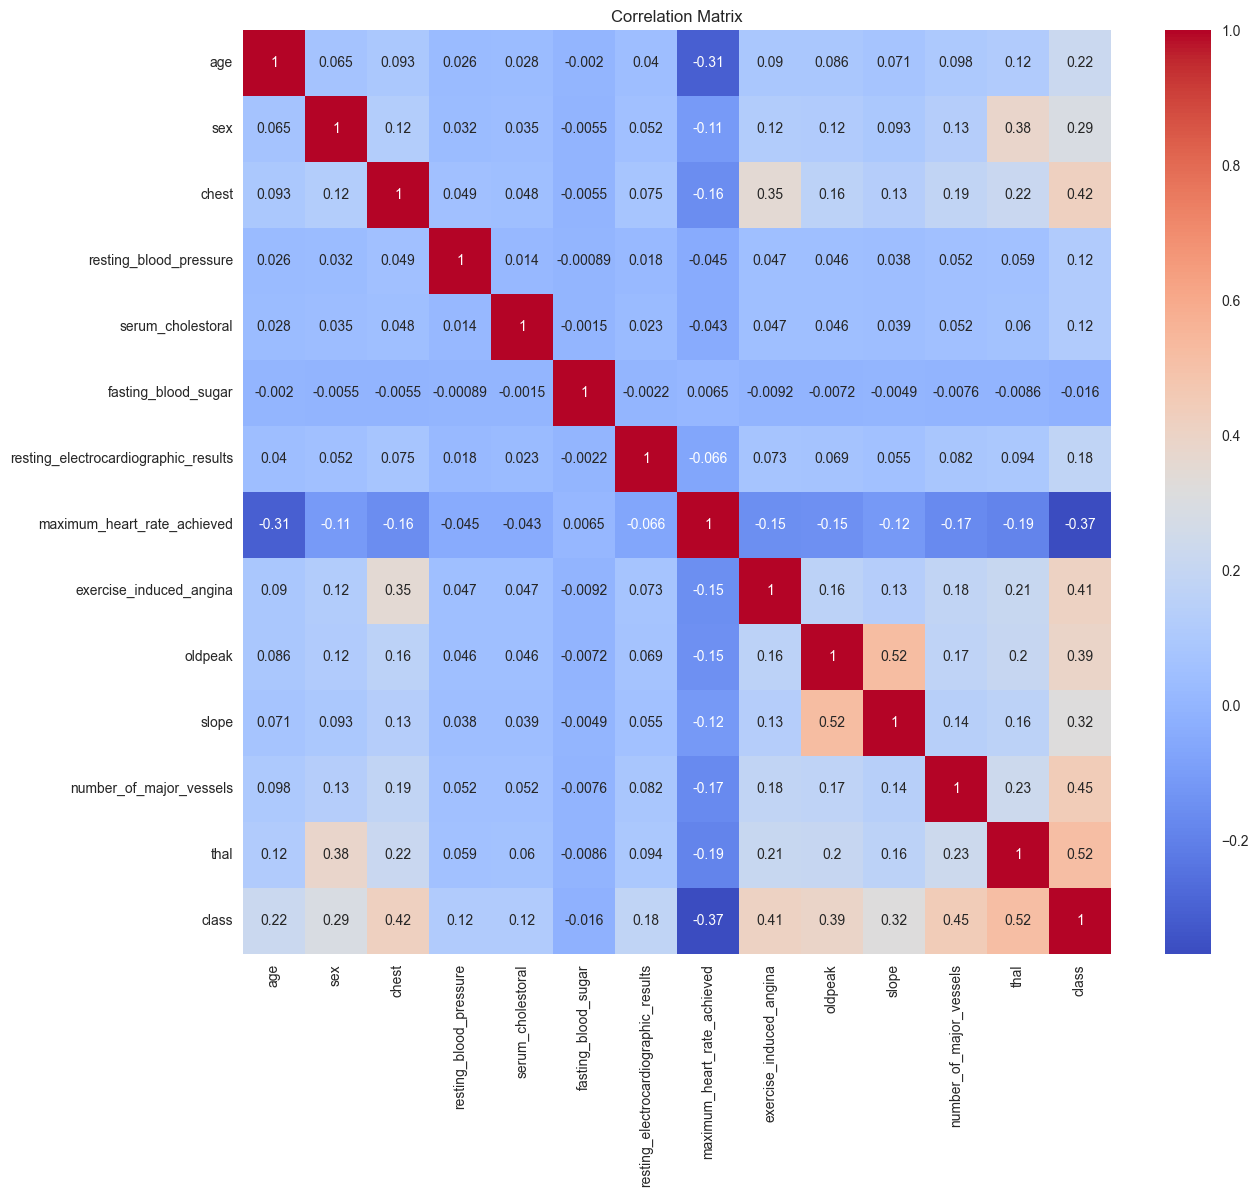

In [92]:
# корреляционная матрица
plt.figure(figsize=(14,12))
corr_matrix = train_1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [93]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [94]:
train = train_1.copy()

In [95]:
X_train=train.drop(['class'],axis=1)
y_train=train['class']

In [96]:
num_data = X_train.select_dtypes(include=np.number)
cat_data = X_train.select_dtypes(exclude=np.number)

In [97]:
y_train.value_counts()

class
0    333489
1    266511
Name: count, dtype: int64

In [98]:
#Создаем объект класса логистическая регрессия
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минизируя logloss
log_reg_full.fit(X_train, y_train)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X_train)
#Создадим временную таблицу X
X_temp = X_train.copy()
#Добавим в эту таблицу результат предсказания
X_temp['class'] = y_pred
X_temp.tail()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7,1
599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7,1
599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7,0
599998,53.716562,1,4.000000,120.061556,276.966278,0,0,171.195150,1,3.007003,2,1,3,1
599999,62.166853,1,3.000000,173.197072,229.909506,0,0,160.233072,1,1.803722,2,0,7,1


In [99]:
#Делаем предсказание моделью, обученной на всех признаках 
y_train_pred = log_reg_full.predict(train.drop('class', axis=1))

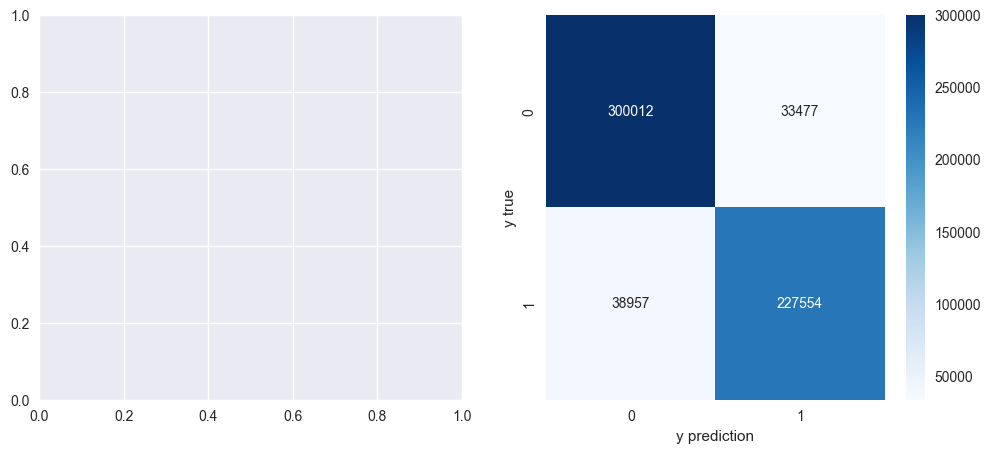

In [100]:
#Строим матрицы ошибок для каждой из моделей
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Строим тепловую карту для матрицы ошибок
sns.heatmap(confusion_matrix, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат

axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

In [101]:
#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_train_pred)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

Accuracy: 0.88
Precision: 0.87
Recall: 0.85
F1 score: 0.86


In [102]:
#Считаем вероятности выявления заболевания 
y_proba_pred = log_reg_full.predict_proba(train.drop('class', axis=1))[:, 1]
#Для удобства завернём numpy-массив в pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность выявления заболевания > threshold относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_train, y_train_pred))
    precision_scores.append(metrics.precision_score(y_train, y_train_pred))
    f1_scores.append(metrics.f1_score(y_train, y_train_pred))

In [103]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.45
#Если вероятность выявления заболевания > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_train, y_pred_opt))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89    333489
           1       0.86      0.87      0.86    266511

    accuracy                           0.88    600000
   macro avg       0.88      0.88      0.88    600000
weighted avg       0.88      0.88      0.88    600000



In [104]:
test_1 = pd.read_csv('test_1.csv')
test_1

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,999995,55.375600,0,3.000000,111.629089,272.110688,0,0,154.583762,0,0.000000,1,0,3
399996,999996,53.782685,1,4.000000,102.819138,285.219928,0,2,153.252226,1,0.000000,1,3,7
399997,999997,55.530874,0,2.053896,106.656515,210.870682,0,2,152.268989,1,1.719441,2,0,3
399998,999998,55.442225,1,4.000000,118.354111,280.867061,0,2,159.820939,0,0.000000,1,0,3


In [105]:
test = test_1.copy()

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

In [107]:
num_test = test.select_dtypes(include=np.number).drop(['ID'],axis=1)
cat_test = test.select_dtypes(exclude=np.number)

In [108]:
test.drop('ID', axis=1, inplace=True)

In [109]:
X_test = test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   400000 non-null  float64
 1   sex                                   400000 non-null  int64  
 2   chest                                 400000 non-null  float64
 3   resting_blood_pressure                400000 non-null  float64
 4   serum_cholestoral                     400000 non-null  float64
 5   fasting_blood_sugar                   400000 non-null  int64  
 6   resting_electrocardiographic_results  400000 non-null  int64  
 7   maximum_heart_rate_achieved           400000 non-null  float64
 8   exercise_induced_angina               400000 non-null  int64  
 9   oldpeak                               400000 non-null  float64
 10  slope                                 400000 non-null  int64  
 11  

In [110]:
model = LogisticRegression()
model.fit(X_train, y_train)  # Обучение модели
predictions = model.predict(X_test)  # Предсказания
print("Предсказания:", predictions)

Предсказания: [1 1 0 ... 0 0 1]


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
# Разделение данных на признаки и целевую переменную
X_train = train.drop('class', axis=1)
y_train = train['class']

# Создание модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
# Предсказания на обучающей выборке
y_train_predictions = model.predict(X_train)

print("Предсказания на обучающей выборке:", y_train_predictions)

# Расчет метрик на обучающей выборке
accuracy = accuracy_score(y_train, y_train_predictions)
precision = precision_score(y_train, y_train_predictions)
recall = recall_score(y_train, y_train_predictions)
f1 = f1_score(y_train, y_train_predictions)

print("Точность (Accuracy):", accuracy)
print("Точность (Precision):", precision)
print("Полнота (Recall):", recall)
print("F1-мера:", f1)

Предсказания на обучающей выборке: [1 0 1 ... 0 1 1]
Точность (Accuracy): 0.9999783333333333
Точность (Precision): 0.9999812388371081
Полнота (Recall): 0.9999699824772711
F1-мера: 0.9999756106255124


In [113]:
#Сделайте предсказание на тестовых данных
y_pred = model.predict(X_test)
y_pred.shape
print(y_pred)

[1 1 0 ... 0 0 1]


In [114]:
# Создание и обучение модели Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [115]:
# Расчет метрик на тренировочной выборке
y_train_pred = model.predict(X_train)
train_metrics = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'Precision': precision_score(y_train, y_train_pred),
    'Recall': recall_score(y_train, y_train_pred),
    'F1 Score': f1_score(y_train, y_train_pred)
}

# Вывод метрик для тренировочной выборки
print("Train Metrics:")
for metric, value in train_metrics.items():
    print(f'{metric}: {value:.2f}')


Train Metrics:
Accuracy: 0.90
Precision: 0.90
Recall: 0.88
F1 Score: 0.89


In [116]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вывод предсказаний
print(y_pred)

[1 1 0 ... 0 0 1]


In [117]:
# Создание и обучение модели XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Расчет метрик
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1_score: {f1_score:.2f}')

Accuracy: 0.90
Precision: 0.90
Recall: 0.88
F1_score: 0.89


[1 1 0 ... 0 0 1]


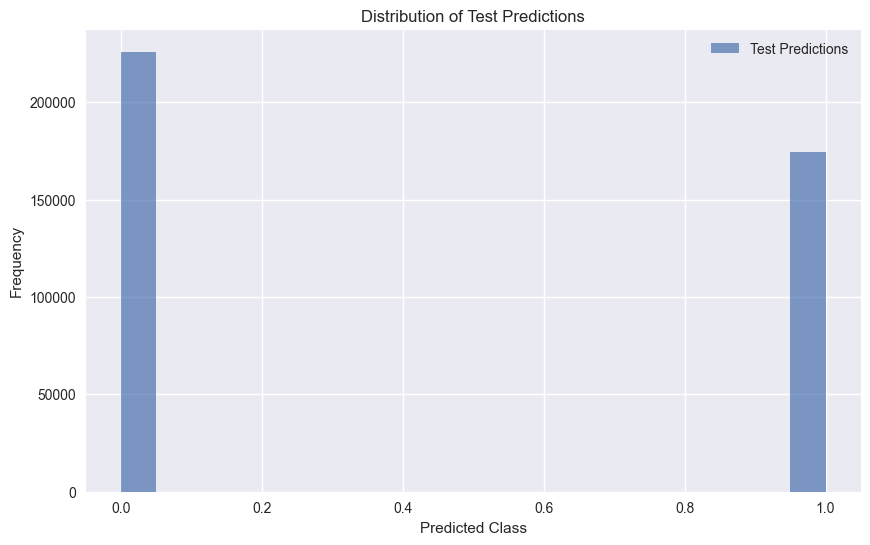

[[0.023893 0.976107]]


In [118]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вывод предсказаний
print(y_pred)

plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=20, alpha=0.7, label='Test Predictions')
plt.title('Distribution of Test Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.legend()
plt.show()

y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba[:1])

[1]


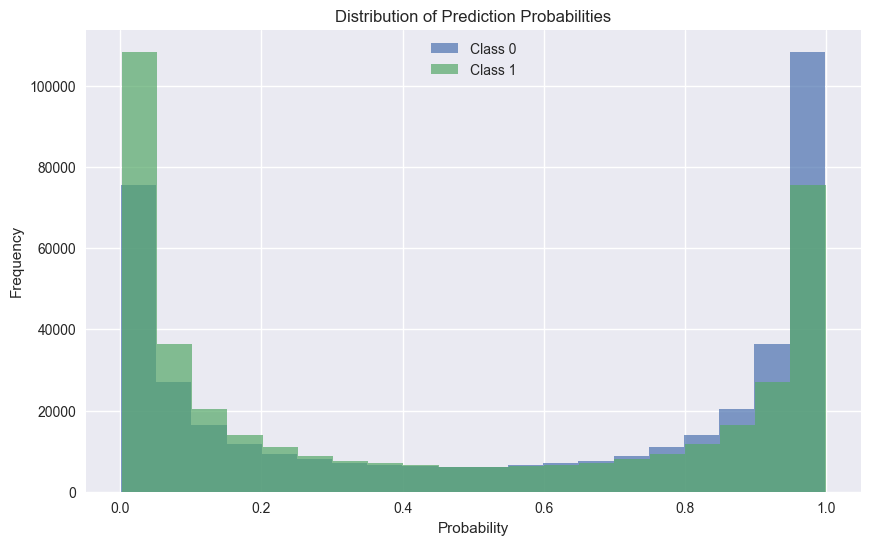

In [119]:
y_pred_classes = np.argmax(y_pred_proba, axis=1)
print(y_pred_classes[:1])  

plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba[:, 0], bins=20, alpha=0.7, label='Class 0')
plt.hist(y_pred_proba[:, 1], bins=20, alpha=0.7, label='Class 1')
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [120]:
threshold = 0.5
y_pred_threshold = (y_pred_proba[:, 1] >= threshold).astype(int)
print(y_pred_threshold[:5])  

[1 1 0 0 0]


In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import keras
import keras.models as M
import keras.layers as L
import keras.backend as K
from keras.layers import Dropout
from keras.layers import BatchNormalization
print(keras.__version__)

3.4.1


In [122]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train))  # <class 'numpy.ndarray'>
print(type(y_train))  # <class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [123]:
X_train=train.drop(['class'],axis=1)
y_train=train['class']

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=10, epochs=7, callbacks=[keras.callbacks.TensorBoard("./logs/keras")])


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.8519 - loss: 0.3596
Epoch 2/7
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - accuracy: 0.8739 - loss: 0.3241
Epoch 3/7
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 208s 3ms/step - accuracy: 0.8777 - loss: 0.3190
Epoch 4/7
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 156s 3ms/step - accuracy: 0.8797 - loss: 0.3142
Epoch 5/7
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 145s 2ms/step - accuracy: 0.8789 - loss: 0.3145
Epoch 6/7
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - accuracy: 0.8803 - loss: 0.3135
Epoch 7/7
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.8799 - loss: 0.3142
